In [1]:
#Import the required layers from the Keras library.
from keras.models import Sequential

# The 'Dense' layers are a kind of densely connected network in which all the neurons are interconnected.
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

# No need to use plt.plot()
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Generate dataset
# Return evenly spaced numbers over a specified interval.
trX = np.linspace(-1, 1, 101)

# Create a y value which is approximately linear but with some random noise.
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33 

In [3]:
# Linear regression model

#----------- Beginning of Model Construction----------#

# This is the standard template for building models in Keras.
model = Sequential()

# After the previous line, you can keep adding multiple layers (stacking them). In this case, we'll only have a 
# single layer.
model.add(Dense(input_dim=1, output_dim=1, init='uniform', activation='linear'))

#----------- End of Model Construction----------#

# Once the model is built, you'll then have to compile it 
# (similar to how you compile a program and it creates an executable).
model.compile(optimizer='sgd', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


//anaconda3/envs/work/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="linear", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [9]:
# This gives us the summary of the model. The number of layers, the input and the output size for each layer.
# And also the total number of parameters.

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Print initial weights

# This is the syntax to get the initial weights. Remember, that the weights are randomly initialized.
weights = model.layers[0].get_weights()
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weight w: %.2f, b: %.2f' % (w_init, b_init))

Linear regression model is initialized with weight w: -0.05, b: 0.00


In [6]:
# Train

# This piece of code, trains your model. You pass in trainX, trainY and also specify the number of iterations 
# for training the model.
model.fit(trX, trY, nb_epoch=100, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100


//anaconda3/envs/work/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


101/101 [==============================] - 0s 922us/step - loss: 1.4464
Epoch 2/100
101/101 [==============================] - 0s 77us/step - loss: 1.3819
Epoch 3/100
101/101 [==============================] - 0s 59us/step - loss: 1.3131
Epoch 4/100
101/101 [==============================] - 0s 89us/step - loss: 1.2494
Epoch 5/100
101/101 [==============================] - 0s 48us/step - loss: 1.1852
Epoch 6/100
101/101 [==============================] - 0s 82us/step - loss: 1.1206
Epoch 7/100
101/101 [==============================] - 0s 49us/step - loss: 1.0686
Epoch 8/100
101/101 [==============================] - 0s 69us/step - loss: 1.0153
Epoch 9/100
101/101 [==============================] - 0s 74us/step - loss: 0.9590
Epoch 10/100
101/101 [==============================] - 0s 73us/step - loss: 0.9137
Epoch 11/100
101/101 [==============================] - 0s 57us/step - loss: 0.8710
Epoch 12/100
101/101 [==============================] - 0s 68us/step - loss: 0.8221
Epoch 13/100

101/101 [==============================] - 0s 101us/step - loss: 0.1265
Epoch 99/100
101/101 [==============================] - 0s 101us/step - loss: 0.1264
Epoch 100/100
101/101 [==============================] - 0s 106us/step - loss: 0.1260


In [7]:
# Print trained weights

# Printing the weights after the model is trained.
weights = model.layers[0].get_weights()

w = weights[0][0][0]
b = weights[1][0]

print('Linear regression model is trained with weight w: %.2f, b: %.2f' % (w, b))

Linear regression model is trained with weight w: 1.82, b: -0.00


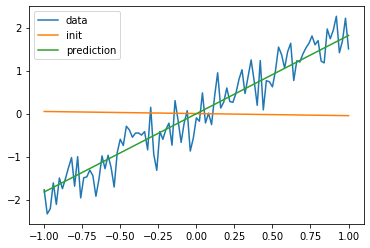

In [8]:
# Plot the given data, prediction with the initial weights, and the final predictions.
plt.plot(trX, trY, label='data')

# Plot of predictions with initial weights
plt.plot(trX, w_init*trX + b_init, label='init')

# Plot of predictions with final weights.
plt.plot(trX, w*trX + b, label='prediction')

plt.legend()